In [29]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn import linear_model
%matplotlib inline
import mwviews
from bs4 import BeautifulSoup
import requests
from mwviews.api import PageviewsClient

### Retrieve movie links from wikipedia scrape

In [2]:
## use beautiful soup to get the film links from each year's '2018 in film' / '2017 in film'
## get links to movies from website within table and <i> wrapper and create a function

## COMMENT OUT RUNNING SCRAPE, ONLY RUN WHEN REFRESH NEEDED, OTHERWISE CHOOSE CSV
# wiki_titles = []
# wiki_urls = []

# def get_links(start_year,end_year):

#     for year in range(start_year,end_year + 1):
#         url = 'https://en.wikipedia.org/wiki/' + str(year) + '_in_film'
#         result = requests.get(url)
#         soup = BeautifulSoup(result.content)
#         links = soup.find_all("table", { "class" : "wikitable sortable" })
        
#         for link in links:
#             for lin in link.find_all('i'):
#                 for i in lin.find_all('a'):
#                     wiki_titles.append(i.get_text())
#                     wiki_urls.append(i.get('href'))

In [3]:
# # run get_links program to refresh title and url scrape
# get_links(2000,2018)

In [3]:
# # convert lists to dataframe and export to csv 
# df_wiki_links = pd.DataFrame(
#     {'wiki_titles': wiki_titles,
#      'wiki_urls': wiki_urls
#     })

# df_wiki_links.to_csv('wikipedia_links.csv',sep=',',index=False)

In [4]:
# import csv with wiki titles and urls
df_wiki_links = pd.read_csv('wikipedia_links.csv')

In [6]:
df_wiki_links.head()

,wiki_title,wiki_url,org_wiki_url,clean_wiki_url
0,Franny's Feet,/wiki/Franny%27s_Feet,/wiki/Franny%27s_Feet,Franny's_Feet
1,Franny's Feet,/wiki/Franny%27s_Feet,/wiki/Franny%27s_Feet,Franny's_Feet
2,Olivia,/wiki/Olivia_(TV_series),/wiki/Olivia_(TV_series),Olivia_(TV_series)
3,Franny's Feet,/wiki/Franny%27s_Feet,/wiki/Franny%27s_Feet,Franny's_Feet
4,Franny's Feet,/wiki/Franny%27s_Feet,/wiki/Franny%27s_Feet,Franny's_Feet


In [7]:
len(df_wiki_links.wiki_url)

2742

### Retrieve summary info and external links from movie Wikipedia page

In [7]:
# plus get info from film page i.e. box office, bomojo link, studio, genre, etc.
# use refernece link to box office mojo rather than trying to match by title

In [1]:
# function to get info from Wikipedia page
list_dicts = []

def get_wiki_info(urls):
    
    for url in urls:
        site_url = 'https://en.wikipedia.org/' + url 
        result = requests.get(site_url)
        soup = BeautifulSoup(result.content)
        info = soup.find_all('table', {'class': 'infobox'})

        # get category title like directed by, studio, boxoffice, etc.
        # categories differ by title/url so I can't just ask for the 5th or 6th element to get what I want
        category_info = []
        try:
            category = info[0].find_all('th', {'scope' : 'row'})
            for cat in category:
                category_info.append(cat.get_text(strip=True))
        except:
            category_info.append(None)
        
        # get the actual information associated with each category
        summary_info = []
        try:
            information = info[0].find_all('td')[1:]
            for inf in information:
                summary_info.append(inf.get_text('|',strip=True))
        except:
            summary_info.append(None)
        # add list items to dictionary to re-create structure from wikipedia
        dictionary = dict(zip(category_info, summary_info))
        dictionary['wiki_url'] = url 
        
        # get external links for bomojo, imdb, metacritic, rottentomatoes for each title and add it to dictionary
        ext_text = soup.find_all('a', {'class': 'external text'})
        ext_links = []
        for ext in ext_text:
            ext_links.append(ext.get('href'))
        
        # ad hoc way to parse out links for each title and site
        for link in ext_links:
            if 'mojo' in link:
                if 'movies' in link:
                    dictionary['bomojo_link'] = link
                else:
                    pass
            elif 'rottentomatoes' in link:
                if 'editorial' in link:
                    pass
                elif 'archive' in link:
                    pass
                else:
                    dictionary['rottentomatoes_link'] = link
            elif 'metacritic' in link:
                if 'user' in link:
                    pass
                elif 'imdb' in link:
                    pass
                elif 'rotten' in link:
                    pass
                elif 'archive' in link:
                    pass
                else:
                    dictionary['metacritic_link'] = link
            elif 'imdb' in link:
                if 'soundtrack' in link:
                    pass
                elif 'metacritic' in link:
                    pass
                elif 'rotten' in link:
                    pass
                elif 'archive' in link:
                    pass
                else:
                    dictionary['imdb_link'] = link
            else:
                pass
        
        list_dicts.append(dictionary)  

In [5]:
get_wiki_info(urls)

In [6]:
list_dicts

[{None: None,
  'wiki_url': 'https://www.boxofficemojo.com/movies/?id=avatar.htm'},
 {None: None,
  'wiki_url': 'https://www.boxofficemojo.com/movies/?id=starwars8.htm'}]

In [10]:
# # convert list of dictionaries into dataframe and choose columns you need
# df_wiki_info = pd.DataFrame(list_dicts)
# df_wiki_info = df_wiki_info[['wiki_url',
#  'Country',
#  'Directed by',
#  'Distributed by',
#  'Distributor',
#  'Genre',
#  'Produced by',
#  'Producer(s)',
#  'Productioncompanies',
#  'Productioncompany',
#  'Productioncompany(s)',
#  'Release date',
#  'Released', 
#  'Length', 'Running time',
#  'Website',
#  'Box office',
#  'Budget',
#  'Written by',
#  'bomojo_link', 'imdb_link', 'metacritic_link', 'rottentomatoes_link']]

In [11]:
# # send data to csv to limit scrape requirements, uncomment when refresh needed
# df_wiki_info.to_csv('wikipedia_page_info.csv',sep=',',index=False)

In [8]:
# comment out script to run scrape and get info
df_wiki_info = pd.read_csv('wikipedia_page_info.csv')

In [9]:
# remove titles that don't have links to bomojo or rottentomatoes
df_wiki_info = df_wiki_info.dropna(subset=['bomojo_link'])
df_wiki_info = df_wiki_info.dropna(subset=['rottentomatoes_link'])

In [10]:
df_wiki_info.head()

,wiki_url,Country,Directed by,Distributed by,Distributor,Genre,Produced by,Producer(s),Productioncompanies,Productioncompany,...,Length,Running time,Website,Box office,Budget,Written by,bomojo_link,imdb_link,metacritic_link,rottentomatoes_link
6,/wiki/Daybreakers,Australia|United States,The Spierig Brothers,Lionsgate,NaN,NaN,Chris Brown|Sean Furst|Bryan Furst,NaN,NaN,Lionsgate|Screen Australia|Pictures in Paradis...,...,NaN,98 minutes,NaN,$51.4 million|[2],$20 million|[1],The Spierig Brothers,https://www.boxofficemojo.com/movies/?id=daybr...,https://www.imdb.com/title/tt0433362/,http://www.metacritic.com/movie/daybreakers,https://www.rottentomatoes.com/m/daybreakers
7,/wiki/Leap_Year_(2010_film),United States|Ireland|[1]|[2],Anand Tucker,Universal Pictures|(United States)|[1]|Optimum...,NaN,NaN,Gary Barber|Chris Bender|Roger Birnbaum|Jonath...,NaN,NaN,Spyglass Entertainment|[1]|BenderSpink,...,NaN,100 minutes|[1],NaN,$32.6 million|[4],$19 million|[3]|[4],NaN,http://www.boxofficemojo.com/movies/?id=leapye...,https://www.imdb.com/title/tt1216492/,http://www.metacritic.com/film/titles/leapyear,https://www.rottentomatoes.com/m/leap_year_2010
8,/wiki/Youth_in_Revolt_(film),United States,Miguel Arteta,Dimension Films,NaN,NaN,David Permut,NaN,NaN,Permut,...,NaN,89 minutes|[1],NaN,"$19,651,093|[3]",$18 million|[2],Gustin Nash,https://www.boxofficemojo.com/movies/?id=youth...,https://www.imdb.com/title/tt0403702/,http://www.metacritic.com/movie/youth-in-revolt,https://www.rottentomatoes.com/m/youth_in_revolt
9,/wiki/Bitch_Slap,United States,Rick Jacobson,Freestyle Releasing|[2]|IM Global|Summit Enter...,NaN,NaN,Eric Gruendemann|Rick Jacobson,NaN,NaN,Epic Slap|[1],...,NaN,109 minutes,NaN,"$514,537|[3]",NaN,Eric Gruendemann|Rick Jacobson,http://www.boxofficemojo.com/movies/?id=bitchs...,https://www.imdb.com/title/tt1212974/,http://www.metacritic.com/movie/bitch-slap,https://www.rottentomatoes.com/m/10010153-bitc...
12,/wiki/Wonderful_World_(2009_film),United States,Joshua Goldin,Magnolia Pictures,NaN,NaN,Miranda Bailey|Matthew Leutwyler|Glenn Williamson,NaN,NaN,NaN,...,NaN,89 minutes,NaN,"$9,309|[1]",NaN,Joshua Goldin,https://www.boxofficemojo.com/movies/?id=wonde...,https://www.imdb.com/title/tt0857275/,http://www.metacritic.com/film/titles/wonderfu...,https://www.rottentomatoes.com/m/10011946-wond...


In [11]:
df_wiki_info.describe()

,wiki_url,Country,Directed by,Distributed by,Distributor,Genre,Produced by,Producer(s),Productioncompanies,Productioncompany,...,Length,Running time,Website,Box office,Budget,Written by,bomojo_link,imdb_link,metacritic_link,rottentomatoes_link
count,2007,2002,2006,1984,1,0.0,1967,1,426,1502,...,0.0,1992,0.0,1980,1668,1076,2007,2005,1843,2007
unique,1962,349,1277,624,1,0.0,1777,1,408,1351,...,0.0,424,0.0,1800,910,918,1961,1959,1803,1962
top,/wiki/Killer_Joe_(film),United States,Tyler Perry,Warner Bros. Pictures,MK2|(France)|IFC Films|(US),NaN,Kevin Feige,Daniel Leconte|Jens Meuer,Walt Disney Pictures|Walt Disney Animation Stu...,Marvel Studios,...,NaN,97 minutes|[1],NaN,Japan,$30 million|[2],Tyler Perry,http://boxofficemojo.com/movies/?page=intl&id=...,https://www.imdb.com/title/tt1640548/,http://www.metacritic.com/movie/mr-holmes,https://www.rottentomatoes.com/m/the_woman_in_...
freq,2,1291,12,127,1,NaN,16,1,3,16,...,NaN,29,NaN,8,28,10,2,2,2,2


#### Test code from above wiki scrape

In [16]:
# url = 'wiki/Spider-Man:_Into_the_Spider-Verse'

In [17]:
# site_url = 'https://en.wikipedia.org/' + url 
# result = requests.get(site_url)
# soup = BeautifulSoup(result.content)
# info = soup.find_all('table', {'class': 'infobox'})

# category = info[0].find_all('th', {'scope' : 'row'})
# category_info = []
# for cat in category:
#     category_info.append(cat.get_text(strip=True))

# category_info

In [18]:
# information = info[0].find_all('td')[1:]
# summary_info = [] 
# for inf in information:
#     summary_info.append(inf.get_text('|',strip=True))

# summary_info

In [19]:
# ext_text = soup.find_all('a', {'class': 'external text'})
# ext_links = []
# for ext in ext_text:
#     ext_links.append(ext.get('href'))

# ext_links

### Retrieve daily search volume from Wikipedia

In [20]:
# import requests
# resp = requests.get("http://en.wikipedia.org/w/api.php?action=query&prop=info&format=json
# &titles=Star_Wars:_The_Last_Jedi")
# print(resp.json())

In [21]:
# resp = requests.get("http://en.wikipedia.org/w/api.php?action=query&prop=info&format=json&Category:2017_films")
# print(resp.json())

In [22]:
# https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia.org/all-access/all-agents/
# Star_Wars%3A_The_Last_Jedi/daily/20160101/20181231

In [23]:
# from mwviews.api import PageviewsClient

In [24]:
# # function to remove wiki from url to create title to search wikipedia api
# wiki_api_titles = []

# def clean_urls(urls):    
#     for url in urls:
#         url = url.replace('%27', "'")
#         url = url.replace('%26', '&')
#         url = url.replace('%28', '(')
#         url = url.replace('%29', ')')
#         url = url.replace('%3F', '?')
#         url = url.replace('%E2%80%93', '-')
#         url = url.replace('%C3%A9', 'é')
#         url = url.replace('%C3%A8', 'é')
#         url = url.replace('%2C', ',')
#         url = url.replace('%C4%97', 'ė')
#         url = url.replace('%C3%A0', 'à')
#         url = url.replace('%C3%BC', 'ü')
        
#         wiki_api_titles.append(url[6:]) 

In [25]:
# clean_urls(df_wiki_links.wiki_urls)

In [26]:
# wiki_api_titles = set(wiki_api_titles)

In [27]:
# # Sends a descriptive User-Agent header with every request
# title_list = []

# def get_wiki_search_vol(titles,start_year,end_year):
#     p = PageviewsClient(user_agent="<person@organization.org> multiple movie titles")
#     for title in titles:
#         try:
#             title_dict = p.article_views('en.wikipedia', title,start=start_year,end=end_year)
#         except:
#             None
#         title_list.append(title_dict)

In [28]:
# get_wiki_search_vol(wiki_api_titles,'19980101','20191231')

In [29]:
# # convert list of dictionaries into dataframe and then export to csv
# df_wiki_search_vol = pd.concat([
#     pd.DataFrame.from_dict(title_dict,orient='index')
#     for title_dict in title_list
# ], axis=1,sort=False)
    
# df_wiki_search_vol.to_csv('wikipedia_search_volume.csv',index=False)

In [30]:
# import csv file when you don't need to refresh search volume
df_wiki_search_vol = pd.read_csv('wikipedia_search_volume.csv')

In [31]:
# look at overall volume, change over time, day before, week before, max volume, starting volume

In [32]:
df_sw7 = pd.DataFrame.from_dict(sw7_vol,orient='index')

NameError: name 'sw7_vol' is not defined

In [ ]:
df_sw7.head()

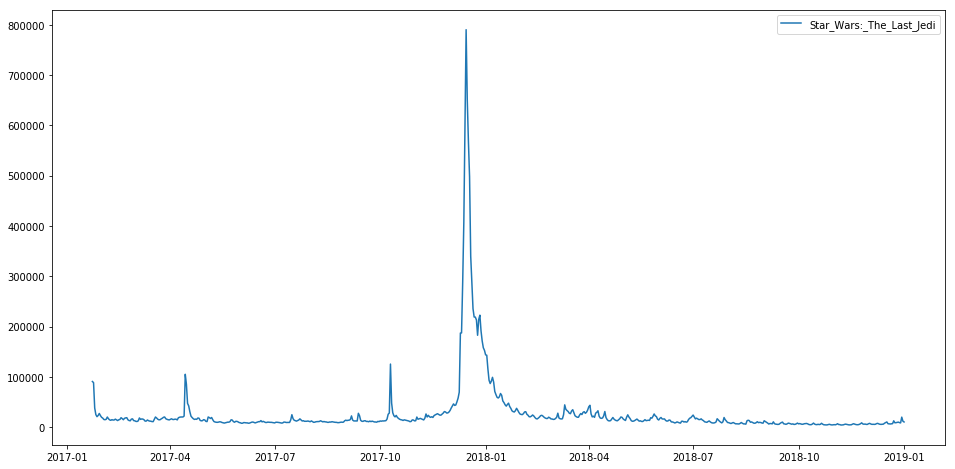

In [102]:
plt.figure(figsize=(16,8))
sns.lineplot(data=df_sw7)
plt.show()

### Retrieve box office mojo information

In [23]:
bomojo_url = 'https://www.boxofficemojo.com/movies/?id=avatar.htm'

In [24]:
result = requests.get(bomojo_url)
soup = BeautifulSoup(result.content)
figures = soup.find_all('div', {'class': 'mp_box_content'})

In [25]:
print(soup.find_all('b')[1].get_text(strip=True)) # bomojo title
print(soup.find_all('b')[5].get_text(strip=True)) #bomojo genre
print(soup.find_all('b')[2].get_text(strip=True)) #domestic box office
print(soup.find_all('b')[3].get_text(strip=True)) #domestic box office
print(soup.find_all('b')[4].get_text(strip=True)) #domestic release date
print(soup.find_all('b')[6].get_text(strip=True)) # runtime
print(soup.find_all('b')[7].get_text(strip=True)) # rating

Avatar
December 18, 2009
$749,766,139
Domestic Lifetime Gross: $760,507,625
Fox
Sci-Fi Adventure
2 hrs. 40 min.


In [26]:
bomojo_url_2 = 'https://www.boxofficemojo.com/movies/?id=starwars8.htm'

In [27]:
result = requests.get(bomojo_url_2)
soup = BeautifulSoup(result.content)
figures = soup.find_all('div', {'class': 'mp_box_content'})

In [28]:
print(soup.find_all('b')[1].get_text(strip=True)) # bomojo title
print(soup.find_all('b')[5].get_text(strip=True)) #bomojo genre
print(soup.find_all('b')[2].get_text(strip=True)) #domestic box office
print(soup.find_all('b')[3].get_text(strip=True)) #domestic box office
print(soup.find_all('b')[4].get_text(strip=True)) #domestic release date
print(soup.find_all('b')[6].get_text(strip=True)) # runtime
print(soup.find_all('b')[7].get_text(strip=True)) # rating

Star Wars:The Last Jedi
Sci-Fi Fantasy
$620,181,382
Buena Vista
December 15, 2017
2 hrs. 31 min.
PG-13


In [19]:
print(soup.find_all('b')[4]) # bomojo title


<b><nobr><a href="/schedule/?view=bydate&amp;release=theatrical&amp;date=2017-12-15&amp;p=.htm">December 15, 2017</a></nobr></b>


In [11]:
print(figures[0].find_all('b')) # domestix box office

[<b>Domestic:</b>, <b>$620,181,382</b>, <b>46.5%</b>, <b>Worldwide:</b>, <b>$1,332,539,889</b>]


In [9]:
print(figures[0].find_all('b')[1].get_text(strip=True)) # domestix box office
print(figures[0].find_all('b')[4].get_text(strip=True)) # worldwide box office
print(figures[1].find_all('td')[1].get_text(strip=True)) # opening weekend domestic box office
print(figures[1].find_all('td')[7].get_text(strip=True)) # widest release number of theaters

$620,181,382
$1,332,539,889
$220,009,584
4,232 theaters


In [34]:
# create a log file for if something fails

In [35]:
# bomojo_url = ['https://www.boxofficemojo.com/movies/?id=dcfilm0617.htm', 
#              'https://www.boxofficemojo.com/movies/?id=animatedspider-man.htm',
#              'https://www.boxofficemojo.com/movies/?id=disneyliveaction22018.htm']

In [7]:
# create function to capture items on each page i'm interested in
bomojo_info = []

def bomojo(urls):
    for url in urls:
        try:
            result = requests.get(url)
            soup = BeautifulSoup(result.content)
            figures = soup.find_all('div', {'class': 'mp_box_content'})

            try: 
                bomojo_info.append((url #bomojo url as primary key
                                    ,soup.find_all('b')[1].get_text(strip=True) #title
                                    ,soup.find_all('b')[5].get_text(strip=True) #genre
                                    ,soup.find_all('b')[4].get_text(strip=True) #domestic release date
                                    ,soup.find_all('b')[7].get_text(strip=True) #rating
                                    ,figures[0].find_all('b')[1].get_text(strip=True) #domestic box office
                                    ,figures[0].find_all('b')[4].get_text(strip=True) #ww box office
                                    ,figures[1].find_all('td')[1].get_text(strip=True) #opening weekend domestic box office
                                    ,figures[1].find_all('td')[7].get_text(strip=True))) # widest release number of theaters
            except:
                bomojo_info.append((url, None, None, None, None, None, None, None, None))
        except:
            bomojo_info.append((url, None, None, None, None, None, None, None, None))

In [18]:
len(df_wiki_info.bomojo_link)

2007

In [11]:
test_urls = ['https://www.boxofficemojo.com/movies/?id=avatar.htm',
       'https://www.boxofficemojo.com/movies/?id=starwars8.htm']

In [12]:
bomojo(urls)

In [13]:
bomojo_info

[('https://www.boxofficemojo.com/movies/?id=avatar.htm',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None),
 ('https://www.boxofficemojo.com/movies/?id=starwars8.htm',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None),
 ('https://www.boxofficemojo.com/movies/?id=avatar.htm',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None),
 ('https://www.boxofficemojo.com/movies/?id=starwars8.htm',
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None)]

In [19]:
bomojo(df_wiki_info.bomojo_link[0:100])

In [20]:
df_bomojo = pd.DataFrame(data=bomojo_info,columns=['bomojo_url','bomojo_title','bomojo_genre', 
                                                   'bomojo_dom_releasedate','bomojo_mpaa_rating', 
                                                   'bomojo_dom_boxoffice','bomojo_ww_boxoffice', 
                                                   'bomojo_opwkd_dom_boxoffice','bomojo_numtheatres'])

In [21]:
df_bomojo

,bomojo_url,bomojo_title,bomojo_genre,bomojo_dom_releasedate,bomojo_mpaa_rating,bomojo_dom_boxoffice,bomojo_ww_boxoffice,bomojo_opwkd_dom_boxoffice,bomojo_numtheatres
0,https://www.boxofficemojo.com/movies/?id=daybr...,Daybreakers,Horror,"January 8, 2010",R,"$30,101,577","$51,416,464","$15,146,692","2,523 theaters"
1,http://www.boxofficemojo.com/movies/?id=leapye...,Leap Year,Romantic Comedy,"January 8, 2010",PG,"$25,918,920","$32,607,316","$9,202,815","2,512 theaters"
2,https://www.boxofficemojo.com/movies/?id=youth...,Youth in Revolt,Comedy,"January 8, 2010",R,"$15,281,286","$19,651,093","$6,888,334","1,873 theaters"
3,http://www.boxofficemojo.com/movies/?id=bitchs...,Bitch Slap,Action,"January 8, 2010",R,"$17,365","$199,436","$12,254",3 theaters
4,https://www.boxofficemojo.com/movies/?id=wonde...,None,None,None,None,None,None,None,None
5,https://www.boxofficemojo.com/movies/?id=booko...,The Book of Eli,Action / Adventure,"January 15, 2010",R,"$94,835,059","$157,107,755","$32,789,494","3,111 theaters"
6,https://www.boxofficemojo.com/movies/?id=spyne...,The Spy Next Door,Action Comedy,"January 15, 2010",PG,"$24,307,086","$45,236,543","$9,726,056","2,924 theaters"
7,https://www.boxofficemojo.com/movies/?id=44inc...,44 Inch Chest,Drama,"January 15, 2010",R,"$39,033","$294,245","$4,185",5 theaters
8,https://www.boxofficemojo.com/movies/?id=fisht...,Fish Tank,Drama,"January 15, 2010",Unrated,"$374,675","$2,357,852","$25,854",15 theaters
9,https://www.boxofficemojo.com/movies/?id=crowl...,Extraordinary Measures,Drama,"January 22, 2010",PG,"$12,068,313","$15,134,293","$6,012,594","2,549 theaters"


### Retrieve RottenTomatoes top critics score and recreate RT score

In [44]:
# retrieve rotten tomatoes scores, dates and critics associated
rottentomatoes_scores = []

def get_rotten_tomatoes(urls):
    for url in urls:
        if url.endswith("/"):
            url_top = url + 'reviews/?type=top_critics'
        else:
            url_top = url + '/reviews/?type=top_critics'
        try:
            result = requests.get(url_top)
            soup = BeautifulSoup(result.content)
            figures = soup.find_all('div', {'class': 'review_table'})
        
            names = figures[0].find_all('div', {'class': 'critic_name'}) # name of people and journal
            dates = figures[0].find_all('div',{'class': 'review_date subtle small'}) # review date
            review_icons = figures[0].find_all('div',{'class': 'review_icon'})

            for name, date, icon in zip(names,dates,review_icons):
                name.find_all('a')
                rottentomatoes_scores.append((url, name.get_text("|",strip=True),
                                              date.get_text(strip=True),icon.get('class')[3]))
        except:
            rottentomatoes_scores.append((url, None, None, None))

In [45]:
rt_links = [link for link in list(df_wiki_info.rottentomatoes_link) if '/m/' in link]
rt_links = set(rt_links)

In [46]:
len(rt_links)

3733

In [47]:
# run function with links from wikipedia and convert to DataFrame
get_rotten_tomatoes(rt_links)
df_rottentomatoes = pd.DataFrame(rottentomatoes_scores, columns = ['rt_url','critic|journal','date','review'])

# send data to csv to limit scrape requirements, uncomment when refresh needed
df_rottentomatoes.to_csv('rottentomatoes_score_info.csv',sep=',',index=False)

In [38]:
# comment out script to run scrape and get info
df_rottentomatoes = pd.read_csv('rottentomatoes_score_info.csv')

In [39]:
df_rottentomatoes.head()

,rt_url,critic|journal,date,review
0,https://www.rottentomatoes.com/m/next_friday,Owen Gleiberman|Entertainment Weekly,"September 7, 2011",rotten
1,https://www.rottentomatoes.com/m/next_friday,Entertainment Weekly,"January 12, 2000",rotten
2,https://www.rottentomatoes.com/m/next_friday,Mick LaSalle|San Francisco Chronicle,"January 1, 2000",fresh
3,https://www.rottentomatoes.com/m/next_friday,Terry Lawson|Detroit Free Press,"January 1, 2000",rotten
4,https://www.rottentomatoes.com/m/next_friday,Lawrence Van Gelder|New York Times,"January 1, 2000",rotten


### Retrieve metacritics score

In [100]:
mc_url = ['http://www.metacritic.com/movie/one-missed-call',
         'http://www.metacritic.com/movie/firstsunday']

In [104]:
metacritic_scores = []


for url in mc_url:
    if url.endswith('/'):
        url_review = url + 'critic-reviews'
    else:
        url_review = url + '/critic-reviews'
    try:
        headers = {'User-Agent': 'Mozilla/5.0'}
        result = requests.get(url_review, headers=headers)
        soup = BeautifulSoup(result.content)

        scores = soup.find_all('div', {'class': 'metascore_w'}) 
        dates = soup.find_all('span', {'class': 'date'})

        for date, score in zip(dates,scores):
            metacritic_scores.append((url, date.get_text(strip=True),score.get_text(strip=True)))
    except:
        metacritic_scores.append((url,None,None))

In [119]:
metacritic_scores = []

In [120]:
url_review = 'http://www.metacritic.com/movie/one-missed-call/critic-reviews'

headers = {'User-Agent': 'Mozilla/5.0'}
result = requests.get(url_review, headers=headers)
soup = BeautifulSoup(result.content)

scores = soup.find_all('div', {'class': 'metascore_w'}) 
dates = soup.find_all('span', {'class': 'date'})

if not dates:
    for score in scores:
        metacritic_scores.append((url, None, score.get_text(strip=True)))
else:
    for date, score in zip(dates,scores):
        metacritic_scores.append((url, date.get_text(strip=True),score.get_text(strip=True)))

In [121]:
metacritic_scores

[('http://www.metacritic.com/movie/firstsunday', None, '50'),
 ('http://www.metacritic.com/movie/firstsunday', None, '42'),
 ('http://www.metacritic.com/movie/firstsunday', None, '40'),
 ('http://www.metacritic.com/movie/firstsunday', None, '38'),
 ('http://www.metacritic.com/movie/firstsunday', None, '38'),
 ('http://www.metacritic.com/movie/firstsunday', None, '38'),
 ('http://www.metacritic.com/movie/firstsunday', None, '30'),
 ('http://www.metacritic.com/movie/firstsunday', None, '30'),
 ('http://www.metacritic.com/movie/firstsunday', None, '30'),
 ('http://www.metacritic.com/movie/firstsunday', None, '25'),
 ('http://www.metacritic.com/movie/firstsunday', None, '25'),
 ('http://www.metacritic.com/movie/firstsunday', None, '12'),
 ('http://www.metacritic.com/movie/firstsunday', None, '11'),
 ('http://www.metacritic.com/movie/firstsunday', None, '10')]

In [82]:
mc_url[0].endswith('/')

False

In [85]:
metacritic_scores

[]

In [122]:
metacritic_scores = []

def get_metacritics_score(urls):
    urls = list(urls)
    for url in urls:
        if url.endswith("/"):
            url_review = url + 'critic-reviews'
        else:
            url_review = url + '/critic-reviews'
        try:
            headers = {'User-Agent': 'Mozilla/5.0'}
            result = requests.get(url_review, headers=headers)
            soup = BeautifulSoup(result.content)

            scores = soup.find_all('div', {'class': 'metascore_w'}) 
            dates = soup.find_all('span', {'class': 'date'})

            if not dates:
                for score in scores:
                    metacritic_scores.append((url, None, score.get_text(strip=True)))
            else:
                for date, score in zip(dates,scores):
                    metacritic_scores.append((url, date.get_text(strip=True),score.get_text(strip=True)))
        except:
            metacritic_scores.append((url, None, None))

In [34]:
df_wiki_info = df_wiki_info.dropna(subset=['metacritic_link'])

In [34]:
df_wiki_info = pd.read_csv('wikipedia_page_info.csv')

In [43]:
test_mc_urls = df_wiki_info.metacritic_link.dropna()[0:10]

In [123]:
list(test_mc_urls)

['http://www.metacritic.com/movie/one-missed-call',
 'http://www.metacritic.com/movie/firstsunday',
 'http://www.metacritic.com/movie/inthenameoftheking',
 'http://www.metacritic.com/movie/27dresses',
 'http://www.metacritic.com/movie/cassandras-dream',
 'http://www.metacritic.com/movie/cloverfield',
 'http://www.metacritic.com/movie/madmoney',
 'http://www.metacritic.com/film/titles/teeth',
 'http://www.metacritic.com/movie/howshemove',
 'http://www.metacritic.com/movie/meet-the-spartans']

In [124]:
get_metacritics_score(test_mc_urls)

In [125]:
metacritic_scores

[('http://www.metacritic.com/movie/one-missed-call', None, '50'),
 ('http://www.metacritic.com/movie/one-missed-call', None, '42'),
 ('http://www.metacritic.com/movie/one-missed-call', None, '40'),
 ('http://www.metacritic.com/movie/one-missed-call', None, '38'),
 ('http://www.metacritic.com/movie/one-missed-call', None, '38'),
 ('http://www.metacritic.com/movie/one-missed-call', None, '38'),
 ('http://www.metacritic.com/movie/one-missed-call', None, '30'),
 ('http://www.metacritic.com/movie/one-missed-call', None, '30'),
 ('http://www.metacritic.com/movie/one-missed-call', None, '30'),
 ('http://www.metacritic.com/movie/one-missed-call', None, '25'),
 ('http://www.metacritic.com/movie/one-missed-call', None, '25'),
 ('http://www.metacritic.com/movie/one-missed-call', None, '12'),
 ('http://www.metacritic.com/movie/one-missed-call', None, '11'),
 ('http://www.metacritic.com/movie/one-missed-call', None, '10'),
 ('http://www.metacritic.com/movie/cassandras-dream', None, '88'),
 ('http:/

In [35]:
get_metacritics_score(df_wiki_info.metacritic_link)
df_metacritic = pd.DataFrame(metacritic_scores, columns=['url','date','score'])

# # send data to csv to limit scrape requirements, uncomment when refresh needed
# df_metacritic.to_csv('metacritic_score_info.csv',sep=',',index=False)

In [42]:
df_metacritic['score'] = pd.to_numeric(df_metacritic['score'],errors='raise')

In [43]:
df_metacritic_scores = df_metacritic.groupby(['url'],as_index=False).mean()

In [45]:
df_metacritic_scores.head(10)

,url,score
0,http://metacritic.com/movie/jeff-who-lives-at-...,64.166667
1,http://metacritic.com/movie/marley,81.718750
2,http://www.metacritic.com/movie/10-cloverfield...,75.744186
3,http://www.metacritic.com/movie/100-bloody-acres,65.800000
4,http://www.metacritic.com/movie/12-strong,57.279070
5,http://www.metacritic.com/movie/12-years-a-slave,94.438596
6,http://www.metacritic.com/movie/127-hours,83.026316
7,http://www.metacritic.com/movie/13-hours-the-s...,54.416667
8,http://www.metacritic.com/movie/2-days-in-new-...,65.576923
9,http://www.metacritic.com/movie/2-guns,58.627907


In [ ]:
# comment out script to run scrape and get info
df_metacritic = pd.read_csv('metacritic_score_info.csv')

In [ ]:
# additional sources to think about, IMDB rating, additional bomojo information like by territory box office,
# 

In [41]:
def data_frames_early(self):
    #create dataframe for wiki link and titles, not really needed, might remove
    self.df_wiki_links = pd.DataFrame({'wiki_title': self.wiki_titles,
                                       'wiki_url': self.wiki_urls})
    self.df_wiki_links.to_csv('wikipedia_links.csv',sep=',',index=False)
    df_wiki_links_clean = pd.DataFrame(self.wiki_api_titles)
    self.df_wiki_links = self.df_wiki_links.merge(df_wiki_links_clean,left_on='wiki_url',right_on='org_url',how='left')

    #create dataframe of wikipedia info, needed for bomojo, rottentomatoes and metacritic scrapes
    self.df_wiki_info = pd.DataFrame(self.list_dicts)
    self.df_wiki_info = self.df_wiki_info[['wiki_url','Country','Directed by','Distributed by',
                                           'Distributor','Genre','Produced by','Producer(s)',
                                           'Productioncompanies','Productioncompany','Productioncompany(s)',
                                           'Release date','Released','Length','Running time','Website',
                                           'Box office','Budget','Written by',
                                           'bomojo_link','imdb_link','metacritic_link', 'rottentomatoes_link']]
    self.df_wiki_info.merge(self.df_wiki_links,left_on='wiki_url',right_on='wiki_url',how='left')
    self.df_wiki_info.to_csv('wikipedia_page_info.csv',sep=',',index=False)
    # remove titles that don't have links to bomojo, rottentomatoes, and metacritic
    self.df_wiki_info = self.df_wiki_info.dropna(subset=['bomojo_link','rottentomatoes_link','metacritic_link'])

In [42]:
org_url

NameError: name 'org_url' is not defined

### Class to retrieve movie information from all sources

In [46]:
class scrape_title_info:
    def __init__(self):
        self.wiki_titles = []
        self.wiki_urls = []
        self.list_dicts = []
        self.wiki_api_titles = []
        self.title_list = []
        self.rottentomatoes_scores = []
        self.metacritic_scores = []
        self.bomojo_info = []

    
    # fit function to run all other functions with status updates through process
    def fit(self,start_year,end_year):
        print('Getting links...')
        self.get_links(start_year,end_year)
        print('Getting wikipedia info from wiki pages...')
        self.get_wiki_info()
        print('Cleaning wikipedia urls...')
        self.clean_wiki_urls()
        print('Setting up early dataframes...')
        self.data_frames_early()
        print('Getting wikipedia search volume...')
        self.get_wiki_search_vol()
        print('Getting box office mojo information...')
        self.bomojo()
        print('Getting rottentomatoes scores...')
        self.get_rotten_tomatoes()
        print('Getting metacritic scores...')
        self.get_metacritics_score
        print('Setting up final dataframes...')
        self.data_frames_final()
        print('Completed!')
    
    
    def get_links(self,start_year,end_year):
        for year in range(start_year,end_year + 1):
            url = 'https://en.wikipedia.org/wiki/' + str(year) + '_in_film'
            result = requests.get(url)
            soup = BeautifulSoup(result.content)
            links = soup.find_all("table", { "class" : "wikitable sortable" })

            for link in links:
                for lin in link.find_all('i'):
                    for i in lin.find_all('a'):
                        self.wiki_titles.append(i.get_text())
                        self.wiki_urls.append(i.get('href'))
 

    def get_wiki_info(self):
        for url in self.wiki_urls:
            site_url = 'https://en.wikipedia.org/' + url 
            result = requests.get(site_url)
            soup = BeautifulSoup(result.content)
            info = soup.find_all('table', {'class': 'infobox'})

            # get category title like directed by, studio, boxoffice, etc.
            # categories differ by title/url so I can't just ask for the 5th or 6th element to get what I want
            category_info = []
            try:
                category = info[0].find_all('th', {'scope' : 'row'})
                for cat in category:
                    category_info.append(cat.get_text(strip=True))
            except:
                category_info.append(None)

            # get the actual information associated with each category
            summary_info = []
            try:
                information = info[0].find_all('td')[1:]
                for inf in information:
                    summary_info.append(inf.get_text('|',strip=True))
            except:
                summary_info.append(None)
            # add list items to dictionary to re-create structure from wikipedia
            dictionary = dict(zip(category_info, summary_info))
            dictionary['wiki_url'] = url 

            # get external links for bomojo, imdb, metacritic, rottentomatoes for each title and add it to dictionary
            ext_text = soup.find_all('a', {'class': 'external text'})
            ext_links = []
            for ext in ext_text:
                ext_links.append(ext.get('href'))

            # ad hoc way to parse out links for each title and site
            for link in ext_links:
                if 'mojo' in link:
                    if 'movies' in link:
                        dictionary['bomojo_link'] = link
                    else:
                        pass
                elif 'rottentomatoes' in link:
                    if 'editorial' in link:
                        pass
                    elif 'archive' in link:
                        pass
                    else:
                        dictionary['rottentomatoes_link'] = link
                elif 'metacritic' in link:
                    if 'user' in link:
                        pass
                    elif 'imdb' in link:
                        pass
                    elif 'rotten' in link:
                        pass
                    elif 'archive' in link:
                        pass
                    else:
                        dictionary['metacritic_link'] = link
                elif 'imdb' in link:
                    if 'soundtrack' in link:
                        pass
                    elif 'metacritic' in link:
                        pass
                    elif 'rotten' in link:
                        pass
                    elif 'archive' in link:
                        pass
                    else:
                        dictionary['imdb_link'] = link
                else:
                    pass

            self.list_dicts.append(dictionary)  

    # remove wikipedia characters in url so the wiki api can read the titles appropriately
    def clean_wiki_urls(self):    
        for url in self.wiki_urls:
            org_url = url
            url = url.replace('%27', "'")
            url = url.replace('%26', '&')
            url = url.replace('%28', '(')
            url = url.replace('%29', ')')
            url = url.replace('%3F', '?')
            url = url.replace('%E2%80%93', '-')
            url = url.replace('%C3%A9', 'é')
            url = url.replace('%C3%A8', 'è')
            url = url.replace('%2C', ',')
            url = url.replace('%C4%97', 'ė')
            url = url.replace('%C3%A0', 'à')
            url = url.replace('%C3%BC', 'ü')
            url = url.replace('%C3%A1', 'á')
            self.wiki_api_titles.append((org_url,url[6:]))

    def data_frames_early(self):
        #create dataframe for wiki link and titles, not really needed, might remove
        self.df_wiki_links = pd.DataFrame({'wiki_title': self.wiki_titles,
                                           'wiki_url': self.wiki_urls})
        df_wiki_links_clean = pd.DataFrame(self.wiki_api_titles,columns=['org_wiki_url','clean_wiki_url'])
        self.df_wiki_links = self.df_wiki_links.merge(df_wiki_links_clean,left_on='wiki_url',right_on='org_wiki_url',how='left')
        self.df_wiki_links.to_csv('wikipedia_links.csv',sep=',',index=False)
        
        #create dataframe of wikipedia info, needed for bomojo, rottentomatoes and metacritic scrapes
        self.df_wiki_info = pd.DataFrame(self.list_dicts)
        self.df_wiki_info = self.df_wiki_info[['wiki_url','Country','Directed by','Distributed by',
                                               'Distributor','Genre','Produced by','Producer(s)',
                                               'Productioncompanies','Productioncompany','Productioncompany(s)',
                                               'Release date','Released','Length','Running time','Website',
                                               'Box office','Budget','Written by',
                                               'bomojo_link','imdb_link','metacritic_link', 'rottentomatoes_link']]
        self.df_wiki_info.merge(self.df_wiki_links,left_on='wiki_url',right_on='wiki_url',how='left')
        self.df_wiki_info.to_csv('wikipedia_page_info.csv',sep=',',index=False)
        # remove titles that don't have links to bomojo, rottentomatoes, and metacritic
        self.df_wiki_info = self.df_wiki_info.dropna(subset=['bomojo_link','rottentomatoes_link','metacritic_link'])
        
    
    # with clean urls, run each title through wikipedia api to get search volume
    def get_wiki_search_vol(self):
        p = PageviewsClient(user_agent="<person@organization.org> multiple movie titles")
        for title in self.df_wiki_links.clean_wiki_url:
            try:
                title_dict = p.article_views('en.wikipedia', title,start='19980101',end='20191231')
            except:
                None
            self.title_list.append(title_dict)

            
    def bomojo(self):
        for url in self.df_wiki_info.bomojo_link:
            try:
                result = requests.get(url)
                soup = BeautifulSoup(result.content)
                figures = soup.find_all('div', {'class': 'mp_box_content'})

                self.bomojo_info.append((url  #bomojo url as primary key
                                         ,soup.find_all('b')[1].get_text(strip=True) #title
                                        ,soup.find_all('b')[5].get_text(strip=True) #genre
                                        ,soup.find_all('b')[4].get_text(strip=True) #domestic release date
                                        ,soup.find_all('b')[7].get_text(strip=True) #rating
                                        ,figures[0].find_all('b')[1].get_text(strip=True) #domestic box office
                                        ,figures[0].find_all('b')[4].get_text(strip=True) #ww box office
                                        ,figures[1].find_all('td')[1].get_text(strip=True) #opening weekend dom box office
                                        ,figures[1].find_all('td')[7].get_text(strip=True))) # widest release # theaters
            except:
                self.bomojo_info.append((url, None, None, None, None, None, None, None, None))

                
    def get_rotten_tomatoes(self):
        self.rt_links = [link for link in list(self.df_wiki_info.rottentomatoes_link) if '/m/' in link]
        self.rt_links = set(self.rt_links) 
        
        for url in self.rt_links:
            if url.endswith("/"):
                url_top = url + 'reviews/?type=top_critics'
            else:
                url_top = url + '/reviews/?type=top_critics'
            try:
                result = requests.get(url_top)
                soup = BeautifulSoup(result.content)
                figures = soup.find_all('div', {'class': 'review_table'})

                names = figures[0].find_all('div', {'class': 'critic_name'}) # name of people and journal
                dates = figures[0].find_all('div',{'class': 'review_date subtle small'}) # review date
                review_icons = figures[0].find_all('div',{'class': 'review_icon'})

                for name, date, icon in zip(names,dates,review_icons):
                    name.find_all('a')
                    self.rottentomatoes_scores.append((url, name.get_text("|",strip=True),
                                                  date.get_text(strip=True),icon.get('class')[3]))
            except:
                self.rottentomatoes_scores.append((url, None, None, None))

        
    def get_metacritics_score():
        urls = list(set(self.df_wiki_info.metacritic_link))
        for url in urls:
            if url.endswith("/"):
                url_review = url + 'critic-reviews'
            else:
                url_review = url + '/critic-reviews'
            try:
                headers = {'User-Agent': 'Mozilla/5.0'}
                result = requests.get(url_review, headers=headers)
                soup = BeautifulSoup(result.content)

                scores = soup.find_all('div', {'class': 'metascore_w'}) 
                dates = soup.find_all('span', {'class': 'date'})

                for date, score in zip(dates,scores):
                    self.metacritic_scores.append((url, date.get_text(strip=True),score.get_text(strip=True)))
            except:
                self.metacritic_scores.append((url, None, None))
    
    def data_frames_final(self):
        df_wiki_search_vol = pd.concat([
            pd.DataFrame.from_dict(title_dict,orient='index')
            for title_dict in self.title_list
        ], axis=1,sort=False)
        df_wiki_search_vol.to_csv('wikipedia_search_volume.csv',index=True)
        
        df_bomojo = pd.DataFrame(data=self.bomojo_info,columns=['bomojo_url','bomojo_title','bomojo_genre', 
                                                   'bomojo_dom_releasedate','bomojo_mpaa_rating', 
                                                   'bomojo_dom_boxoffice','bomojo_ww_boxoffice', 
                                                   'bomojo_opwkd_dom_boxoffice','bomojo_numtheatres'])
        df_bomojo.to_csv('bomojo_data.csv',index=False)
        
        df_rottentomatoes = pd.DataFrame(data=self.rottentomatoes_scores, columns = ['rt_url','rt_critic|journal','rt_date','rt_review'])
        df_rottentomatoes.to_csv('rottentomatoes_score_data.csv',sep=',',index=False)
        
        df_metacritic = pd.DataFrame(data=self.metacritic_scores, columns=['mc_url','mc_date','mc_score'])
        df_metacritic.to_csv('metacritic_score_info.csv',sep=',',index=False)        

In [47]:
scraper = scrape_title_info()
scraper.fit(2010,2018)

Getting links...
Getting wikipedia info from wiki pages...
Cleaning wikipedia urls...
Setting up early dataframes...
Getting wikipedia search volume...
ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/ex.php%3Ftitle%3DThe_Devil%27s_Rapture%26action%3Dedit%26redlink%3D1/daily/1998010100/2019123100']


Traceback (most recent call last):
  File "c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\mwviews\api\pageviews.py", line 145, in article_views
    'The pageview API returned nothing useful at: {}'.format(urls)
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/ex.php%3Ftitle%3DThe_Devil%27s_Rapture%26action%3Dedit%26redlink%3D1/daily/1998010100/2019123100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/ex.php%3Ftitle%3DSpinning_Plates%26action%3Dedit%26redlink%3D1/daily/1998010100/2019123100']


Traceback (most recent call last):
  File "c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\mwviews\api\pageviews.py", line 145, in article_views
    'The pageview API returned nothing useful at: {}'.format(urls)
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/ex.php%3Ftitle%3DSpinning_Plates%26action%3Dedit%26redlink%3D1/daily/1998010100/2019123100']


ERROR while fetching and parsing ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/ex.php%3Ftitle%3DBlack_Coffee_%282014_film%29%26action%3Dedit%26redlink%3D1/daily/1998010100/2019123100']


Traceback (most recent call last):
  File "c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\mwviews\api\pageviews.py", line 145, in article_views
    'The pageview API returned nothing useful at: {}'.format(urls)
Exception: The pageview API returned nothing useful at: ['https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia/all-access/all-agents/ex.php%3Ftitle%3DBlack_Coffee_%282014_film%29%26action%3Dedit%26redlink%3D1/daily/1998010100/2019123100']


Getting box office mojo information...
Getting rottentomatoes scores...
Getting metacritic scores...
Setting up final dataframes...
Completed!


In [29]:
#linear regression

In [ ]:
class pipeline:

    def __init__(self):
        self.scraper = scrape_title_info()
        self.cleaner = [    ]()
        
    def fit(self, start_year,end_year):
        self.scraper.fit(start_year,end_year)
        self.cleaner.fit()

In [ ]:
# look at mpaa rating and how that affects things, genre, time of year release